In [1]:
import pathlib
import glob
import re
import pprint
import pandas as pd
import os
from tqdm import tqdm
import codecs

In [2]:
p_temp = pathlib.Path('../../dataset/')

In [3]:
pprint.pprint(list(p_temp.iterdir()))

[WindowsPath('../../dataset/idol_id.csv')]


In [4]:
idol_data_path = '../../dataset/'
twitter_data_path = '../../TwitterData/'

# アイドルのIDデータを読み込む

In [5]:
df = pd.read_csv(idol_data_path+'idol_id.csv')

In [6]:
df.head(100)

,id,screen_name
0,818326171880341504,aizome_karen
1,1245736739919941633,yuraneko_
2,1086770060,peroperorinko01
3,1109751762733301760,nekomataokayu
4,747745043725815808,okada_ayame
5,1109748792721432577,inugamikorone
6,1133215093246664706,usadapekora
7,72809395,eitaso
8,1964755448,arimuraairi
9,1270386719808839681,yanemintchan


In [7]:
id_list = df.values.tolist()
id_list = ([r[0] for r in id_list])

In [8]:
print(id_list)

[818326171880341504, 1245736739919941633, 1086770060, 1109751762733301760, 747745043725815808, 1109748792721432577, 1133215093246664706, 72809395, 1964755448, 1270386719808839681, 1355780078286725121, 782993407656374273, 719821086527893505]


# ツイートデータを読み込む

In [9]:
json_open = open(twitter_data_path+"/2021-12-07.json", 'r',encoding="utf-8")
base = pd.read_json(json_open,orient='records')

In [10]:
result = pd.DataFrame(columns=['id','text'])

# アイドルIDリストを使ってアイドルのツイートDataFrameを作る


In [11]:
for index, row in base.iterrows():
    text = row[0]['text']
    id = row[0]['user']['id']
    if id in id_list:
        print(row[0]['user']['name'])
        result = result.append({ 'id':id,'text':text},ignore_index=True)
    

ゆら猫💚🐈‍⬛
ゆら猫💚🐈‍⬛
ゆら猫💚🐈‍⬛
ぺろりん先生 (鹿目凛)
藍染カレン
ぺろりん先生 (鹿目凛)
岡田 彩夢@虹のコンキスタドール
有村藍里
小鳩りあ(こばとりあ)
岡田 彩夢@虹のコンキスタドール
眠森ペティ📔🗝️
岡田 彩夢@虹のコンキスタドール
小鳩りあ(こばとりあ)
蛭田 愛梨@虹のコンキスタドール
兎田ぺこら👯‍♀️ホロライブ3期生
ゆら猫💚🐈‍⬛
ぺろりん先生 (鹿目凛)
ぺろりん先生 (鹿目凛)
猫又おかゆ🍙
蛭田 愛梨@虹のコンキスタドール
小鳩りあ(こばとりあ)
蛭田 愛梨@虹のコンキスタドール
岡田 彩夢@虹のコンキスタドール
戌神ころね🥐
蛭田 愛梨@虹のコンキスタドール
兎田ぺこら👯‍♀️ホロライブ3期生
蛭田 愛梨@虹のコンキスタドール
マキシマムえいたそ☆成瀬瑛美
有村藍里
蛭田 愛梨@虹のコンキスタドール
蛭田 愛梨@虹のコンキスタドール
眠森ペティ📔🗝️
眠森ペティ📔🗝️
ゆるいやね
ゆるいやね
眠森ペティ📔🗝️
小鳩りあ(こばとりあ)
蛭田 愛梨@虹のコンキスタドール


In [12]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
id      38 non-null object
text    38 non-null object
dtypes: object(2)
memory usage: 688.0+ bytes


# ディレクトリ内のデータ全部に適応
ディレクトリ内のファイル名のみ一覧を取得し、それで回していく。


In [13]:
files = os.listdir(twitter_data_path)
files_file = [f for f in files if os.path.isfile(os.path.join(twitter_data_path, f))]
print(files_file)

['2020-09-13.json', '2020-09-14.json', '2020-09-15.json', '2020-09-16.json', '2020-09-17.json', '2020-09-18.json', '2020-09-19.json', '2020-09-20.json', '2020-09-21.json', '2020-09-22.json', '2020-09-23.json', '2020-09-24.json', '2020-09-25.json', '2020-09-26.json', '2020-09-27.json', '2020-09-28.json', '2020-09-29.json', '2020-09-30.json', '2020-10-01.json', '2020-10-02.json', '2020-10-03.json', '2020-10-04.json', '2020-10-05.json', '2020-10-06.json', '2020-10-07.json', '2020-10-08.json', '2020-10-09.json', '2020-10-11.json', '2020-10-12.json', '2020-10-13.json', '2020-10-14.json', '2020-10-15.json', '2020-10-19.json', '2020-10-20.json', '2020-10-21.json', '2020-10-22.json', '2020-10-23.json', '2020-10-24.json', '2020-10-25.json', '2020-10-26.json', '2020-10-27.json', '2020-10-28.json', '2020-10-29.json', '2020-10-30.json', '2020-10-31.json', '2020-11-02.json', '2020-11-03.json', '2020-11-04.json', '2020-11-05.json', '2020-11-06.json', '2020-11-07.json', '2020-11-08.json', '2020-11-09

In [14]:
result = pd.DataFrame(columns=['id','text'])

for file_name in (files_file):
    with codecs.open(twitter_data_path+file_name, "r", "utf-8", "ignore") as file:
        base = pd.read_json(file,orient='records')
    for index, row in base.iterrows():
        text = row[0]['text']
        id = row[0]['user']['id']
        if id in id_list:
            result = result.append({ 'id':id,'text':text},ignore_index=True)


In [15]:
result.head()

,id,text
0,719821086527893505,え！？あのスクランブル交差点から見えるあれ！？うおおおお！！！！！！ https://t.c...
1,719821086527893505,アーカイブ見てるんですけどサイゼの「当たり前にシェアして〜」のまとばせんぱいの顔でめちゃめち...
2,719821086527893505,#虹コンサマワン0912
3,719821086527893505,そうだったんですね！😳これからは毎回チェックしちゃお〜🤟🤟🤟 https://t.co/ym...
4,719821086527893505,やまとぱいせんのウインク可愛すぎません？？え、かわよ\n #虹コンサマワン0912


In [16]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11844 entries, 0 to 11843
Data columns (total 2 columns):
id      11844 non-null object
text    11844 non-null object
dtypes: object(2)
memory usage: 185.1+ KB


# URLなど余計なテキストを取り除く

In [17]:
def format_text(text):
    '''
    MeCabに入れる前のツイートの整形方法例
    '''
    text = re.sub(r' ', '\n', text)
    text = re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-…]+', "", text)
    text = re.sub('RT', "", text)
    text = re.sub('お気に入り', "", text)
    text = re.sub('まとめ', "", text)
    #ハッシュタグの検出のため、¥n#にしてから抜いていく
    text = re.sub(r'#', '\n#', text)
    text = re.sub(r'(\A|\n|[ -/:-@\[-~]|\s)#.+(\n|[ -/:-@\[-~]|\Z|\s)', "", text) #ハッシュタグは別で入れるのでここでは消していたい
    #同じようにして@ユーザー名も消したい
    text = re.sub(r'(\A|\n|[ -/:-@\[-~]|\s)@.+(\n|[ -/:-@\[-~]|\Z|\s)', "", text)
    #text = re.sub(r'[ -/:-@\[-~]', "", text)  # 半角記号
    #text = re.sub(r'[︰-＠]', "", text)  # 全角記号
    text = re.sub('\n', " ", text)  # 改行文字

    return text

In [18]:
format_idoldf = result
for index,row in format_idoldf.iterrows():
    format_idoldf.loc[index]['text'] = format_text(row['text'])

In [24]:
result.tail()

,id,text
11839,1355780078286725121,【🔴歌枠/singing】懐古ニコ厨のお歌配信🎤古いボカロ曲とか色々歌うのだわっ♡※アーカイ...
11840,1086770060,配信ありがとう🤍大人の体操着😘
11841,747745043725815808,明日…！！！！！ 稲川淳二さんのニコ生チャンネルにお邪魔します うおおおおお うお…うお...
11842,818326171880341504,おやぞめ♣️
11843,782993407656374273,今日も生きた🧸💭


In [1]:
import MeCab

# 取り出したい品詞
select_conditions = ['動詞', '形容詞', '名詞']

# 分かち書きオブジェクト
tagger = MeCab.Tagger('')

# Neologdの指定版 最新語に対応する
# tagger = MeCab.Tagger('-d /usr/lib64/mecab/dic/mecab-ipadic-neologd')

# 安定するらしい
tagger.parse('')


def wakati_text(text):
    """
    文書textを分かち書きして、半角スペース区切りの単語文字列に変換する

    Parameters
    ----------
    text: str
        文書

    Returns
    -------
    text_result: str
        分かち書きされた文書

    """

    # 分けてノードごとにする
    node = tagger.parseToNode(text)
    terms = []

    while node:

        # 単語
        term = node.surface

        # 品詞
        pos = node.feature.split(',')[0]

        # もし品詞が条件と一致してたら
        if pos in select_conditions:
            terms.append(term)

        node = node.next

    # 連結おじさん
    text_result = ' '.join(terms)
    return text_result


text = "私はプログラミングが苦手です"

'''
私 プログラミング 苦手
'''
print(wakati_text(text))


私 プログラミング 苦手


In [2]:
def mecab_analysis(text):
    t = mc.Tagger('')
    enc_text = text.encode('utf-8') 
    node = t.parseToNode(enc_text) 
    output = []
    while(node):
        if node.surface != "":  # ヘッダとフッタを除外
            word_type = node.feature.split(",")[0]
            if word_type in ["形容詞", "動詞","名詞"]:
                output.append(node.surface)
        node = node.next
        if node is None:
            break
    return output

In [18]:
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
def show_word_cloud(ws):

    # 環境に合わせてフォントのパスを指定する。
    #fpath = "/System/Library/Fonts/HelveticaNeue-UltraLight.otf"
    ws_show = []
    for i in range(len(ws)):
        word_times = ws[i][1]
        if word_times>0:
            for j in range(word_times):
                ws_show.append(ws[i][0])
    # 綺麗に整列してると、「あああ あああ」という単語と判断されるので、シャッフル
    random.shuffle(ws_show)
    # スペース区切りにする
    texts = ' '.join(ws_show)

    # ストップワードの設定
    stop_words = [ u'てる', u'いる', u'なる', u'れる', u'する', u'ある', u'こと', u'これ', u'さん', u'して', \
             u'くれる', u'やる', u'くださる', u'そう', u'せる', u'した',  u'思う',  \
             u'それ', u'ここ', u'ちゃん', u'くん', u'', u'て',u'に',u'を',u'は',u'の', u'が', u'と', u'た', u'し', u'で', \
             u'ない', u'も', u'な', u'い', u'か', u'ので', u'よう', u'']

    wordcloud = WordCloud(background_color="white", width=900, height=500, \
                          stopwords=set(stop_words)).generate(texts)

    plt.figure(figsize=(15,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

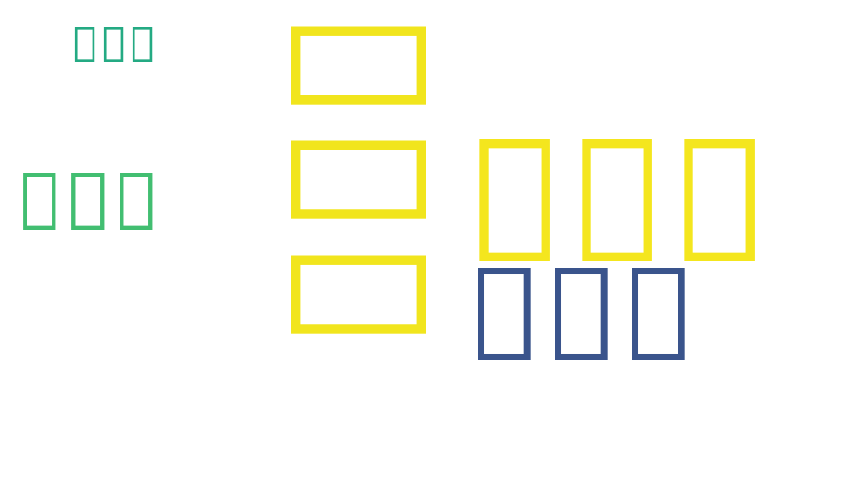

In [20]:
words = [['あああ', 100], ['いいい', 80], ['ううう', 40], 
         ['えええ', 10], ['おおお',2]]

show_word_cloud(words)